# Analysis of the Iris dataset

In this session we will be exploring the Iris dataset in more detail, and applying some of the models that we've learnt about.

Using R is difficult at first, which is why you have all the code here ready to copy and paste into your session! However, I'd encourage you to try and understand what each line of code is doing.

We will:

1) Load in the data

2) Plot some histograms and scatter plots to understand the distribution / correlation of features.

3) Run a few types of model and compare results.

## Load the data and explore

If you're using Rstudio you will need to set your working directory to wherever you downloaded the files.

For example:

setwd('M:/machine_learning/')

In [1]:
# Load in the data into a "Data Frame" (table) and print the first few rows
data <- read.csv('iris_data.csv')
head(data)

sepal.length,sepal.width,petal.length,petal.width,variety
5.1,3.5,1.4,0.2,Setosa
4.9,3.0,1.4,0.2,Setosa
4.7,3.2,1.3,0.2,Setosa
4.6,3.1,1.5,0.2,Setosa
5.0,3.6,1.4,0.2,Setosa
5.4,3.9,1.7,0.4,Setosa


Find some basic properties of the dataset - how many rows there are and whether there is any missing data. (NA stands for Not Available).

In [2]:
nrow(data)

[1] 150

In [3]:
any(is.na(data))

[1] FALSE

## Explore the features in more detail (Histograms and summary statistics)

So we know there are 150 rows in the table and no missing values.

Now we will look in more detail at the features of the data, to understand what has been collected.

To begin, plot a histogram of each variable using the *hist* command.

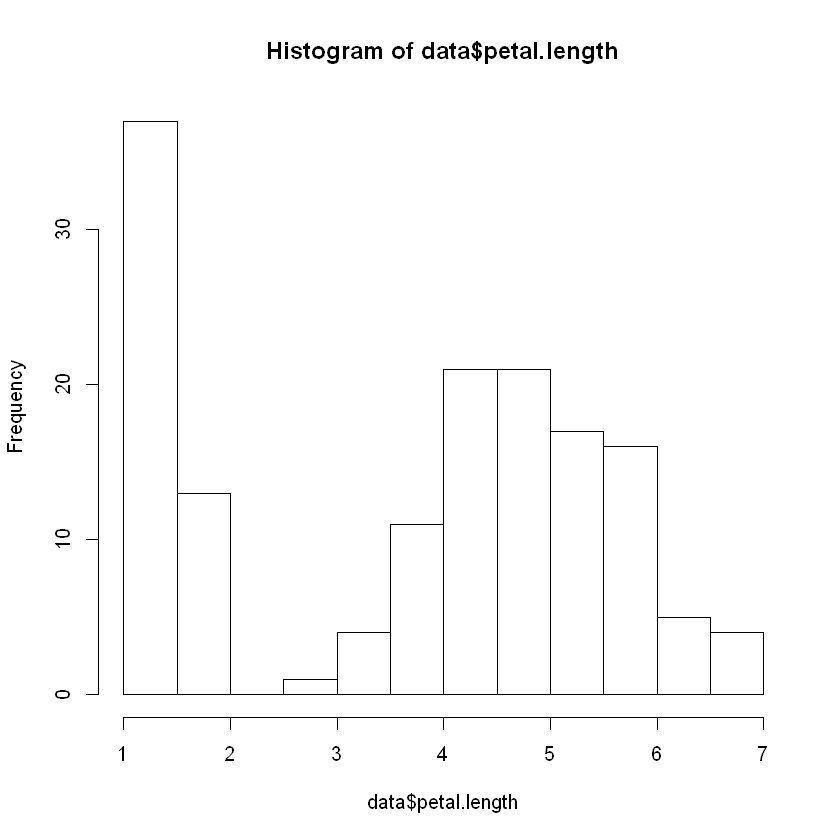

In [4]:
hist(data$petal.length)

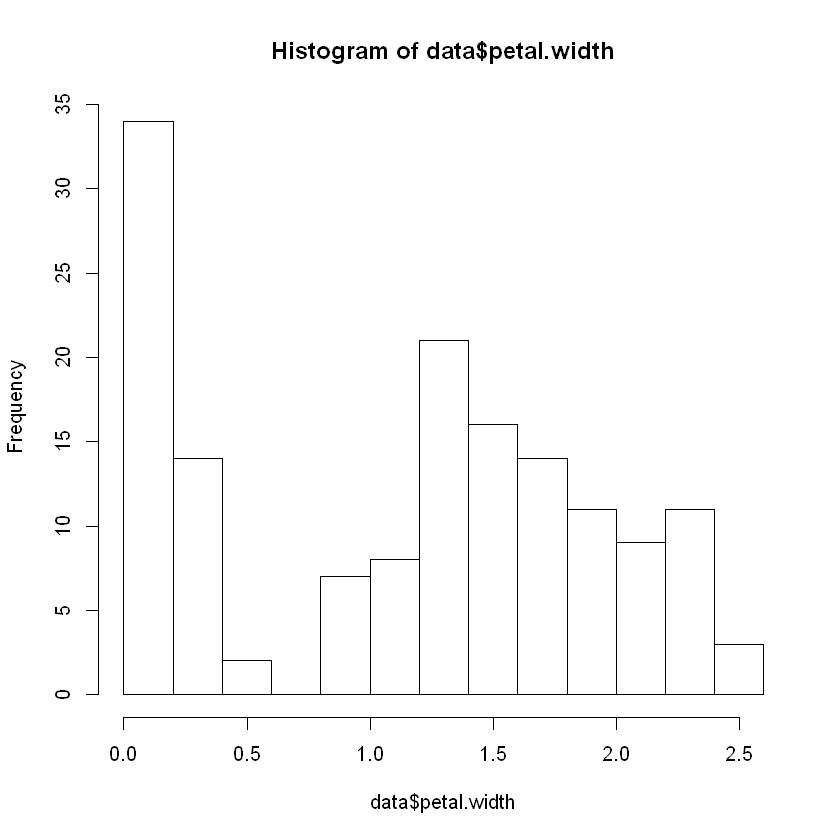

In [5]:
hist(data$petal.width)

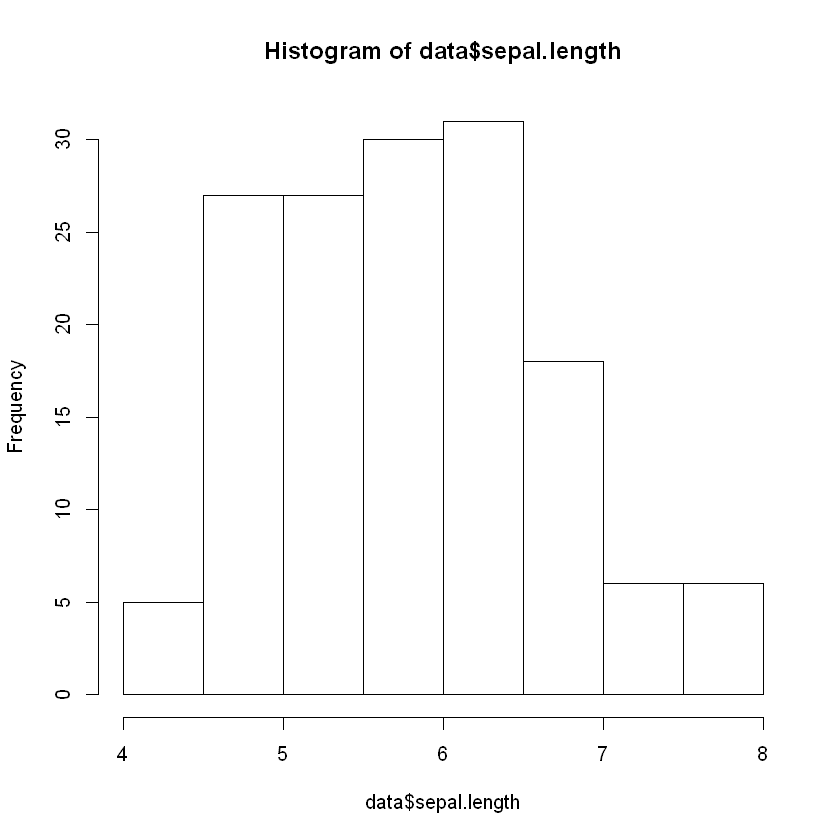

In [6]:
hist(data$sepal.length)

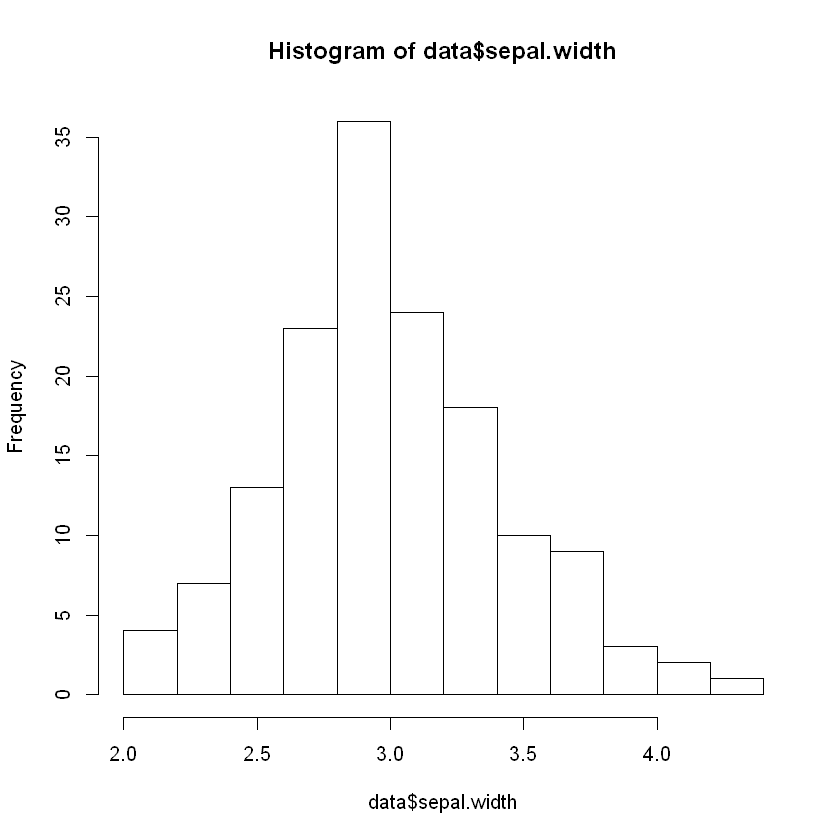

In [7]:
hist(data$sepal.width)

The petal and sepal data have quite distributions. This is something we will want to explore further before doing any modelling.

We can also use the *summary* command on our table to plot the usual summary statistics.

In [8]:
summary(data)

  sepal.length    sepal.width     petal.length    petal.width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       variety  
 Setosa    :50  
 Versicolor:50  
 Virginica :50  
                
                
                

### Questions:

1) How many variables/features are in the data? What are their names?

2) How many items of each class do we have? (Are the classes imbalanced?)

3) What is the mean and median petal length? Why are they so different?

4) What is the potential issue with the two petal features?

Let's explore the petal features in some more detail.

We saw from the histograms that the petal features had two disjointed sets of values (this is called multimodal data).

To investigate what is going on here, let's select the subset with small petals and summarise this section of the data.

In [9]:
subset <- data[data$petal.length < 2.1, ] # Select the subset where petal.length < 2.1 
summary(subset)

  sepal.length    sepal.width     petal.length    petal.width   
 Min.   :4.300   Min.   :2.300   Min.   :1.000   Min.   :0.100  
 1st Qu.:4.800   1st Qu.:3.200   1st Qu.:1.400   1st Qu.:0.200  
 Median :5.000   Median :3.400   Median :1.500   Median :0.200  
 Mean   :5.006   Mean   :3.428   Mean   :1.462   Mean   :0.246  
 3rd Qu.:5.200   3rd Qu.:3.675   3rd Qu.:1.575   3rd Qu.:0.300  
 Max.   :5.800   Max.   :4.400   Max.   :1.900   Max.   :0.600  
       variety  
 Setosa    :50  
 Versicolor: 0  
 Virginica : 0  
                
                
                

In [10]:
subset <- data[data$petal.width < 0.75, ] # Select the subset where petal.width < 0.75
summary(subset)

  sepal.length    sepal.width     petal.length    petal.width   
 Min.   :4.300   Min.   :2.300   Min.   :1.000   Min.   :0.100  
 1st Qu.:4.800   1st Qu.:3.200   1st Qu.:1.400   1st Qu.:0.200  
 Median :5.000   Median :3.400   Median :1.500   Median :0.200  
 Mean   :5.006   Mean   :3.428   Mean   :1.462   Mean   :0.246  
 3rd Qu.:5.200   3rd Qu.:3.675   3rd Qu.:1.575   3rd Qu.:0.300  
 Max.   :5.800   Max.   :4.400   Max.   :1.900   Max.   :0.600  
       variety  
 Setosa    :50  
 Versicolor: 0  
 Virginica : 0  
                
                
                

### Question: 

What have we learnt from this?

## Cross-feature Visualisations

It is also important to look at how features relate to one another before we start modelling!

The following code will draw a scatter plot between two of the variables, and colour code the values by the species of flower.

The plot command has three arguments:
- x = the feature on the x-axis
- y = the feature on the y-axis
- col = the categories used to decide what colour each data point should be

Look carefully at these plots and think about which variables are correlated to one another.

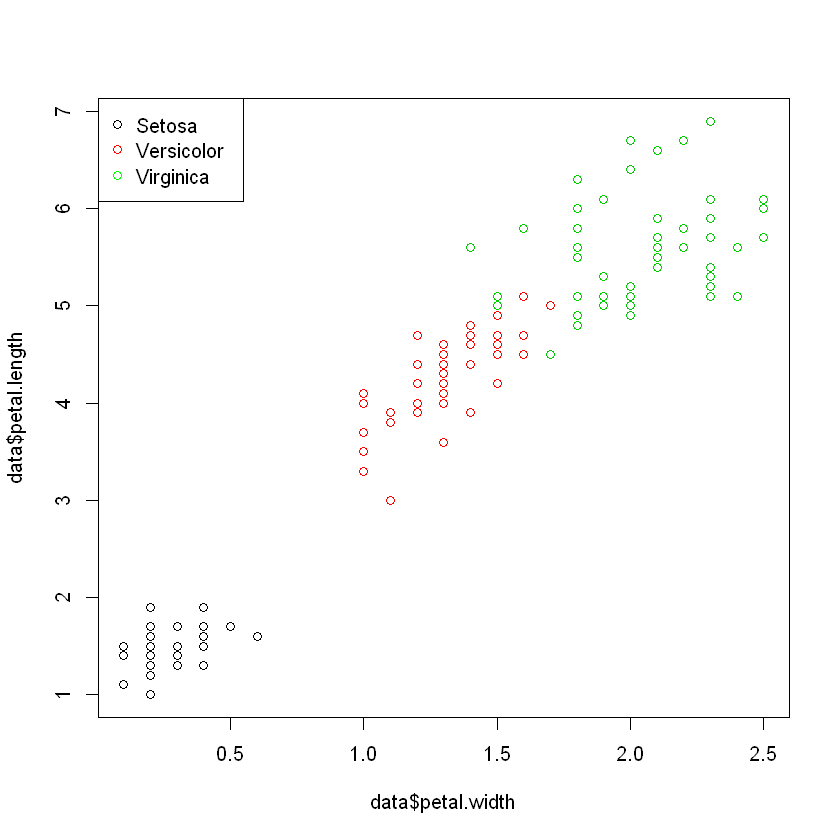

In [11]:
plot(x = data$petal.width, y = data$petal.length, col = data$variety)
legend('topleft', legend = c('Setosa', 'Versicolor', 'Virginica'), col = c('black', 'red', 'green'), pch = 1)

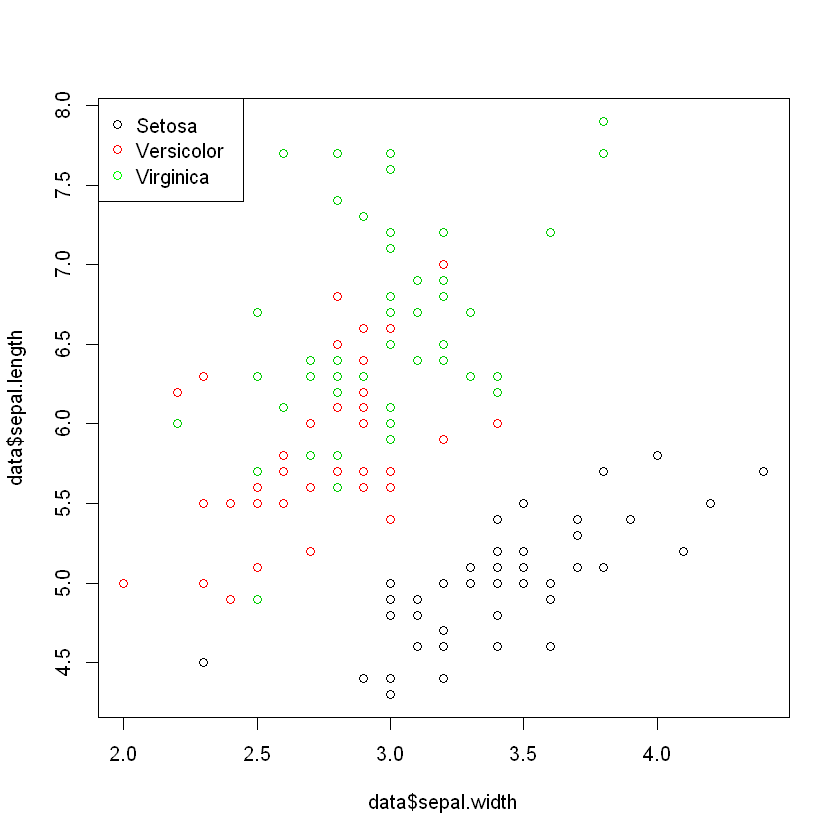

In [12]:
plot(x = data$sepal.width, y = data$sepal.length, col = data$variety)
legend('topleft', legend = c('Setosa', 'Versicolor', 'Virginica'), col = c('black', 'red', 'green'), pch = 1)

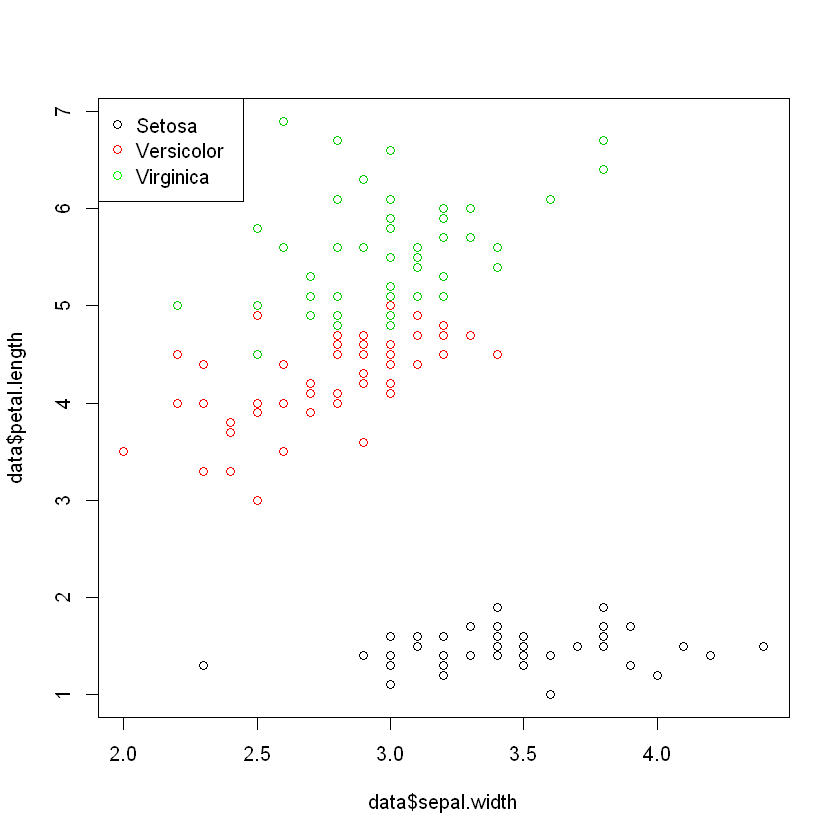

In [13]:
plot(x = data$sepal.width, y = data$petal.length, col = data$variety)
legend('topleft', legend = c('Setosa', 'Versicolor', 'Virginica'), col = c('black', 'red', 'green'), pch = 1)

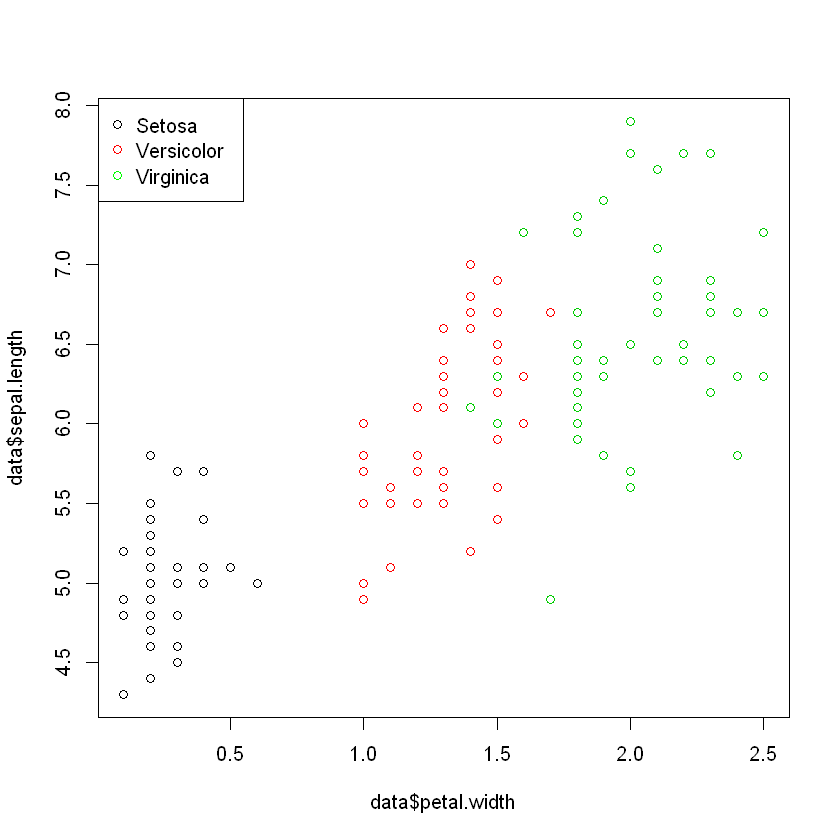

In [14]:
plot(x = data$petal.width, y = data$sepal.length, col = data$variety)
legend('topleft', legend = c('Setosa', 'Versicolor', 'Virginica'), col = c('black', 'red', 'green'), pch = 1)

### Questions:

1) Are the red and green (Versicolor and Virginica) species linearly separable in any of these plots?

2) If we use just two variables in our model, which pair would find the classification easiest? Which would be the hardest?

## Classification

Now we will apply some of the classification techniques that we learnt earlier.

First job is to split the data into training and test sets using a standard 80-20 split.

We will be training models on the training dataset and applying them to the test dataset.

In [15]:
set.seed(101) # Set the random number generator, so that everyone in the class gets the same answers
sample <- sample.int(n = nrow(data), size = floor(0.8*nrow(data)), replace = F) # Pick some random numbers
train <- data[sample, ] # Use these random numbers to get a training dataset
test  <- data[-sample, ] # Use everything else as the test dataset

In [16]:
nrow(train) # Number of training samples

[1] 120

In [17]:
nrow(test) # Number of test samples

[1] 30

### k Nearest Neighbour

I'm not 100% sure that you will be able to load R libraries on the computers so copy-paste these two functions into the terminal, it's a kNN algorithm I wrote earlier!

Try and understand what the code is doing using the comments provided.

In [18]:
# Code to find the mode (most common value) from a list x
Mode <- function(x) {
  ux <- unique(x) # What are the unique values in the list
  ux[which.max(tabulate(match(x, ux)))] # Count up how many of each there are and take the largest one
}

In [19]:
# Function to train and evaluate a kNN model
knn <- function(train, test, k, features=c('petal.width', 'petal.length', 'sepal.width', 'sepal.length')) {
    # Find out how much data we have to deal with
    ntrain <- nrow(train)
    ntest <- nrow(test)
    
    # Predict new data points based on training data - one at a time
    output <- vector() # Set up empty list to store our results
    for (n in rownames(test)) {
        cur <- test[n, features] # Get new data point
        
        # Next two lines find the distance from all training points to our new data
        mid <- train[,features] - as.data.frame(lapply(cur, rep, ntrain))
        distances <- sqrt(apply(mid**2, 1, sum))
        
        mink <- sort(distances)[1:k] # Take the smallest k of these points
        knns <- as.vector(train[rownames(as.data.frame(mink)), 'variety']) # Get the classes of these k points
        knns <- Mode(knns) # Find the most common class
        output <- c(output, knns) # Add to our list of results
    }
    output # Give the results back to the terminal
}

In [20]:
# Example using k = 3 and the two features: petal.length and sepal.width
# The function is written such that, if you don't say which features you want, it will use them all by default

knn(train, test, 3, features=c('petal.length', 'sepal.width'))

[1] "Setosa"     "Setosa"     "Setosa"     "Setosa"     "Setosa"    
 [6] "Setosa"     "Setosa"     "Setosa"     "Setosa"     "Setosa"    
[11] "Versicolor" "Versicolor" "Versicolor" "Versicolor" "Versicolor"
[16] "Virginica"  "Versicolor" "Versicolor" "Versicolor" "Virginica" 
[21] "Versicolor" "Virginica"  "Virginica"  "Virginica"  "Virginica" 
[26] "Virginica"  "Virginica"  "Virginica"  "Virginica"  "Virginica"

We will run a few different knn models with different values of k and different features!

In [21]:
K1 <- knn(train, test, 1)
K3 <- knn(train, test, 3)

In [22]:
A1 <- knn(train, test, 1, features=c('petal.width', 'sepal.width'))

The following function will summarise the data for a given model, giving you enough information to draw a confusion matrix. Copy and paste it into the terminal before using it :)

In [23]:
modelSummary <- function(test, modeloutput) {
    test$predicted <- modeloutput
    summ <- aggregate(test[, c('variety', 'predicted')], by=test[, c('variety', 'predicted')], FUN = length)[1:3]
    colnames(summ) <- c('true_class', 'predicted_class', 'count')
    summ
}

In [24]:
# Summarise the model K1 on our test data

modelSummary(test, K1)

true_class,predicted_class,count
Setosa,Setosa,10
Versicolor,Versicolor,9
Virginica,Versicolor,1
Virginica,Virginica,10


### Questions:

1) Run the kNN model above with the following combinations of parameters. (Feel free to try out more too!)

- k = 1, all features
- k = 3, all features
- k = 1, features = c('petal.width', 'sepal.width')

2) Use the model summary function to write down the confusion matrix for these models.

3) Compute the accuracy of the last model, then the precision and recall for each class.

4) Compute the overall precision and recall (mean of the class-specific precision and recall).

## SVM

To use SVM we will need to use a library (too complex for me to code up easily).

Try this, if it doesn't work then read through it to understand what we've done, and then move onto logistic regression.

In [25]:
# Install the library with the SVM algorithm
install.packages("e1071", repos = 'https://cran.r-project.org')
library(e1071)

package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hsssre\AppData\Local\Temp\Rtmp6VWpyU\downloaded_packages


Warning message:
"package 'e1071' was built under R version 3.5.3"

In [26]:
# Build a linear and radial-basis function SVM on our training data

Slinear <- svm(variety ~ petal.length + sepal.width, data=train, kernel = 'linear')

Srbf <- svm(variety ~ petal.length + sepal.width, data=train, gamma = 0.5)

In [27]:
# Use the modelSummary function from above to see how it perfoms on the test data
modelSummary(test, predict(Slinear, newdata=test))

true_class,predicted_class,count
Setosa,Setosa,10
Versicolor,Versicolor,8
Virginica,Versicolor,2
Versicolor,Virginica,1
Virginica,Virginica,9


In [28]:
modelSummary(test, predict(Srbf, newdata=test))

true_class,predicted_class,count
Setosa,Setosa,10
Versicolor,Versicolor,8
Virginica,Versicolor,3
Versicolor,Virginica,1
Virginica,Virginica,8


### Question:

What is the accuracy of each model? Which is better?

Because we only used two variables to build the SVMs, we can plot the decision boundaries to see where the SVM found the best separation of the classes.

The linear SVM will put a straight line through the data where it thinks the best split is.

The RBF SVM will use more complex curves to separate the data.

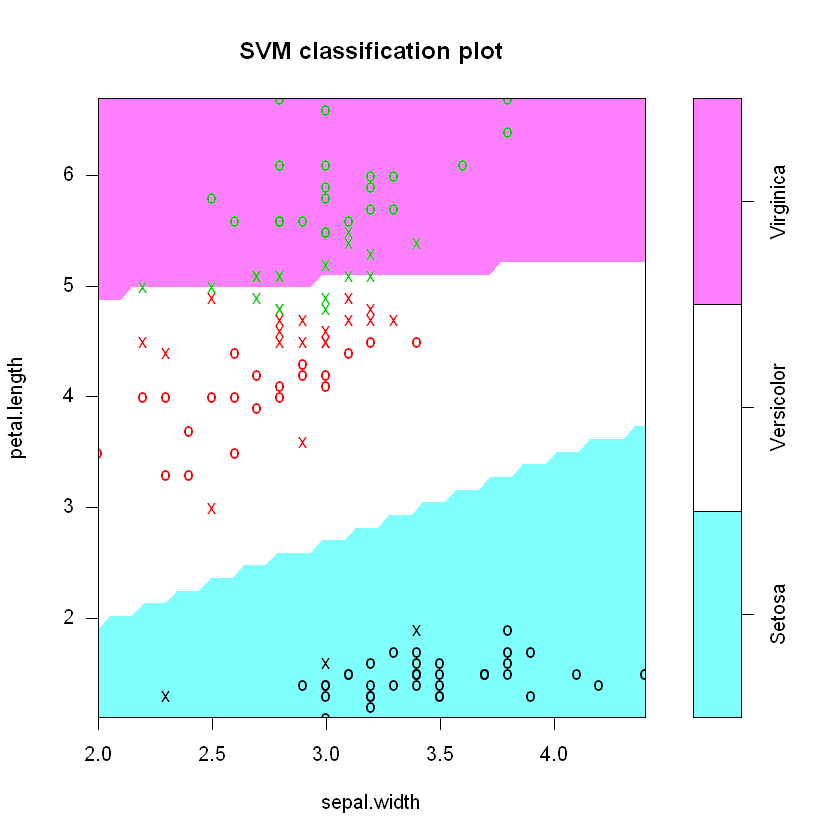

In [29]:
# Plot the decision boundaries of the linear SVM
plot(Slinear, train, petal.length ~ sepal.width)

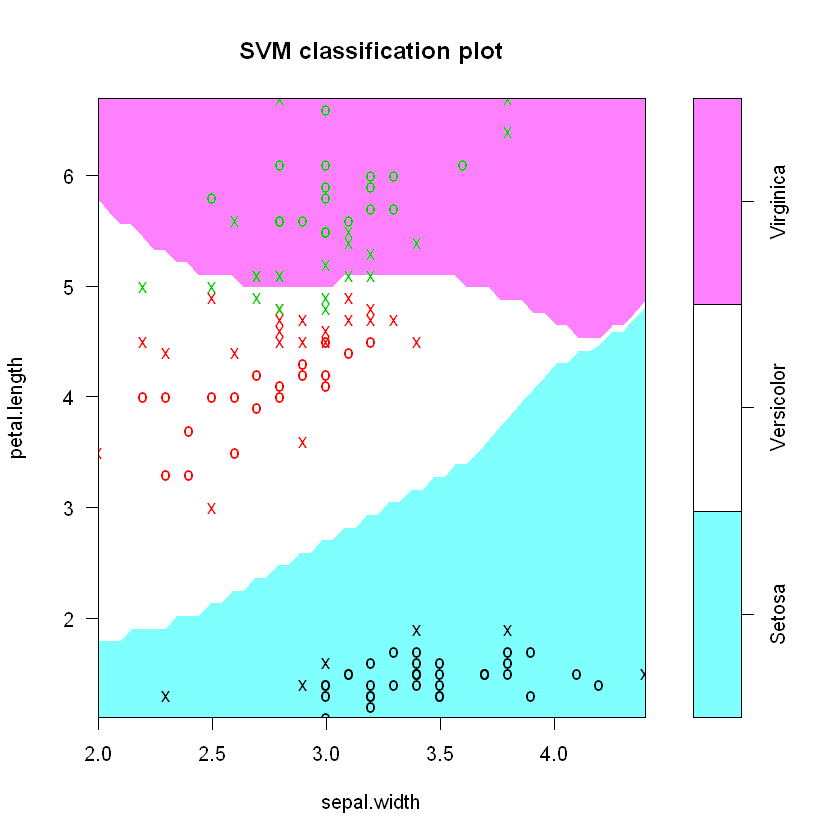

In [30]:
# Plot the decision boundaries of the RBF SVM
plot(Srbf, train, petal.length ~ sepal.width)

## Logistic regression (One vs All)

Logistic regression - as you know - is used for binary classification, but we have 3 classes in this dataset.

How do we proceed?

We can train 3 logistic regression models (one for each class) to predict the probability of new data being in each class, and then take the maximal one as our overall classification.

For instance, say that we have a new data point and our three logistic regression models give the following probabilities:
- Virginica = 0.75
- Versicolor = 0.81
- Setosa = 0.06
Then we would classify the new data point as Versicolor.

Below is a function that will train 3 logistic regressions and predict the categories for new data. Try and read through the code to understand what it is doing.

**Hint:** The line *as.formula(paste(c('is.Virginica ~', paste(features, sep = '', collapse = ' + '))))* turns the list
$$features <- c('petal.width', 'sepal.width')$$
into
$$ is.Virginica \sim petal.width + sepal.width$$

In [31]:
logreg <- function(train, test, features=c('petal.width', 'petal.length', 'sepal.width', 'sepal.length')) {
    # Add new columns to our training data to say whether 
    # each row is Virginica (True/False), Versicolor (True/False), or Setosa (True/False)
    train$is.Virginica <- train$variety == 'Virginica'
    train$is.Versicolor <- train$variety == 'Versicolor'
    train$is.Setosa <- train$variety == 'Setosa'
    
    # Train logistic regression models for the three cases using the glm function
    m.Virginica <- glm(as.formula(paste(c('is.Virginica ~', paste(features, sep = '', collapse = ' + ')))), 
                       family = binomial, data=train)
    m.Versicolor <- glm(as.formula(paste(c('is.Versicolor ~', paste(features, sep = '', collapse = ' + ')))), 
                       family = binomial, data=train)
    m.Setosa <- glm(as.formula(paste(c('is.Setosa ~', paste(features, sep = '', collapse = ' + ')))), 
                       family = binomial, data=train)
    
    # Predict classes for new data
    output <- vector() # Empty list to store the results
    for (n in rownames(test)) {
        cur <- test[n, features] # Get next data point
        # Assume that the highest probability is Virginica to start
        bestprob <- predict(m.Virginica, newdata=cur, type='response')
        bestclass <- 'Virginica'
        
        # If probability of Versicolor is higher then update our prediction
        if (predict(m.Versicolor, newdata=cur, type='response') > bestprob) {
            bestprob <- predict(m.Versicolor, newdata=cur, type='response')
            bestclass <- 'Versicolor'
        }
        # If probability of Seta is highest then update our prediction
        if (predict(m.Setosa, newdata=cur, type='response') > bestprob) {
            bestprob <- predict(m.Setosa, newdata=cur, type='response')
            bestclass <- 'Setosa'
        }
        output <- c(output, bestclass) # Save result into the list
    }
    output # Pass list back to the terminal
}

In [32]:
logreg.allvariables <- logreg(train, test)
modelSummary(test, logreg.allvariables)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

true_class,predicted_class,count
Setosa,Setosa,10
Versicolor,Versicolor,8
Virginica,Versicolor,1
Versicolor,Virginica,1
Virginica,Virginica,10


In [33]:
logreg.reduced <- logreg(train, test, features=c('petal.width', 'sepal.width'))
modelSummary(test, logreg.reduced)

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

true_class,predicted_class,count
Setosa,Setosa,10
Versicolor,Versicolor,8
Versicolor,Virginica,1
Virginica,Virginica,11


### Questions:

1) Which model is most accurate? Why might this be (hint: look at the scatter plots near the beginning)?

2) Some other ways to handle multiple classes with logistic regression are multinomial regression and ordinal logistic regression. Try to research the difference between the two using Google.

3) Taking different random samples of our data will give different confusion matrices (and hence different accuracy figures). For example, run the code below and check the accuracy of the samples **(despite using the same model!)**. Research how "cross-validation" can help us to understand the size of this randomness.

In [34]:
# First random sample
set.seed(42)
sample <- sample.int(n = nrow(data), size = floor(0.8*nrow(data)), replace = F)
train <- data[sample, ]
test  <- data[-sample, ]

K1 <- knn(train, test, 3)
modelSummary(test, K1)

true_class,predicted_class,count
Setosa,Setosa,12
Versicolor,Versicolor,9
Virginica,Virginica,9


In [35]:
# Second random sample
set.seed(666)
sample <- sample.int(n = nrow(data), size = floor(0.8*nrow(data)), replace = F)
train <- data[sample, ]
test  <- data[-sample, ]

K2 <- knn(train, test, 3)
modelSummary(test, K2)

true_class,predicted_class,count
Setosa,Setosa,8
Versicolor,Versicolor,7
Versicolor,Virginica,1
Virginica,Virginica,14


In [36]:
# Third random sample
set.seed(2019)
sample <- sample.int(n = nrow(data), size = floor(0.8*nrow(data)), replace = F)
train <- data[sample, ]
test  <- data[-sample, ]

K3<- knn(train, test, 3)
modelSummary(test, K3)

true_class,predicted_class,count
Setosa,Setosa,10
Versicolor,Versicolor,9
Versicolor,Virginica,1
Virginica,Virginica,10
